## Loading datasets

In [4]:
pip install tensorflow_datasets 

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/5.3 MB ? eta -:--:--
   --- ------------------------------------ 0.5/5.3 MB 1.2 MB/s eta 0:00:05
   ----- ---------------------------------- 0.8/5.3 MB 1.2 MB/s eta 0:00:04
   ------- -------------------------------- 1.0/5.3 MB 1.2 MB/s eta 0:00:04
   --------- ------------------------------ 1.3/5.3 MB 1.2 MB/s eta 0:00:04
   ----------- ---------------------------- 1.6/5.3 MB 1.2 MB/s eta 0:00:04
   ------------- -------------------------- 1.8/5.3 MB 1.2 MB/s eta 0:00:03
   ------------- -------------------------- 1.8/5.3 MB 1.2 MB/s eta 0:00:03


In [42]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("Done!")

Done!


In [31]:
(ds_train, ds_test), ds_info = tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)

X_train = []
y_train = []

for img, label in tfds.as_numpy(ds_train):
    X_train.append(img)
    y_train.append(label)

X_test = []
y_test = []

for img, label in tfds.as_numpy(ds_test):
    X_test.append(img)
    y_test.append(label)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
    
print(np.min(y_train), np.max(y_train))

y_train -= 1
y_test -= 1

print(np.min(y_train), np.max(y_train))


1 26
0 25


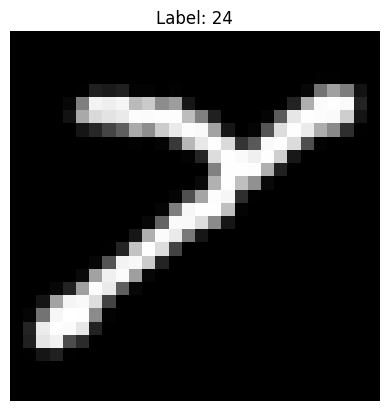

In [32]:
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis("off")
plt.show()

In [33]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [62]:
print(X_train.shape[0]+X_test.shape[0])

103600


## Training

In [39]:
model = Sequential([
    Input(shape=(28,28,1)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(26,activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_data=(X_test, y_test)
)

Epoch 1/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 56s 19ms/step - accuracy: 0.8540 - loss: 0.4625 - val_accuracy: 0.8909 - val_loss: 0.3233
Epoch 2/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 51s 18ms/step - accuracy: 0.9218 - loss: 0.2343 - val_accuracy: 0.9161 - val_loss: 0.2485
Epoch 3/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 52s 19ms/step - accuracy: 0.9369 - loss: 0.1850 - val_accuracy: 0.9157 - val_loss: 0.2412
Epoch 4/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 51s 19ms/step - accuracy: 0.9449 - loss: 0.1549 - val_accuracy: 0.9193 - val_loss: 0.2402
Epoch 5/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 52s 19ms/step - accuracy: 0.9522 - loss: 0.1305 - val_accuracy: 0.9201 - val_loss: 0.2389


In [49]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

463/463 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step


C:\Users\DINESH\AppData\Local\Temp\ipykernel_15808\1376728337.py:7: RuntimeWarning: invalid value encountered in divide
  cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)


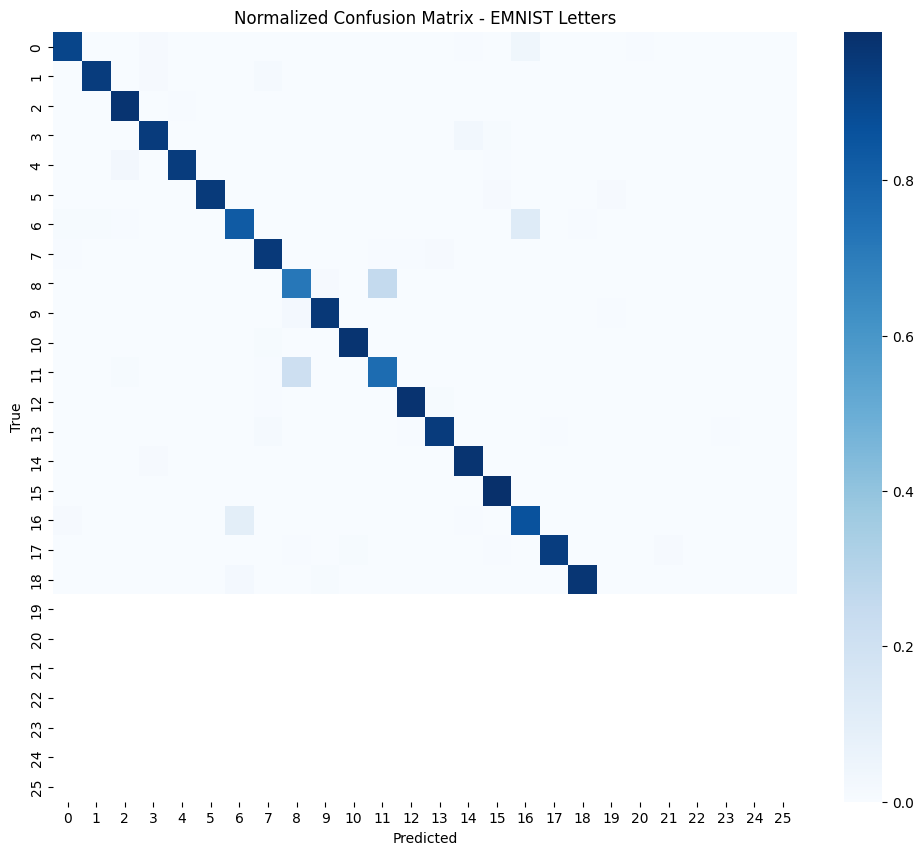

In [56]:
cm = confusion_matrix(
    y_test,
    y_pred_classes,
    labels=np.arange(26)   # Force 0–25
)

cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(12,10))
sns.heatmap(cm_normalized, cmap="Blues")
plt.title("Normalized Confusion Matrix - EMNIST Letters")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [59]:
print("Unique labels in y_test:", np.unique(y_test))
print("Unique labels in predictions:", np.unique(y_pred_classes))
print(cm.shape)
print(len(y_test))


Unique labels in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Unique labels in predictions: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
(26, 26)
14800
